In [1]:
import PbPMethods2 as pm2
from pylab import *
%matplotlib inline
import pandas as pd
import seaborn

In [2]:
dfs = []
for season in range(2007, 2017):
    dfs.append(pd.read_csv(pm2.get_gamebygame_data_filename(season)))
dfs = pd.concat(dfs)
#dfs.head()

In [3]:
forwards = dfs[dfs.Pos == 'F']
defense = dfs[dfs.Pos == 'D']

In [4]:
grouped = forwards[['Player', 'Team', 'Season', 'TOION(60s)', 'iG', 'iA1', 'iA2']].groupby(
    ['Player', 'Team', 'Season']).sum()
grouped.reset_index(inplace=True)
grouped['TOIRank'] = grouped.sort_values(by="TOION(60s)", ascending=False).groupby(['Season'])['TOION(60s)'].rank(ascending=False)
grouped.sort_values(by='TOION(60s)', ascending=False, inplace=True)
grouped = grouped[grouped.TOIRank <= 360]
grouped['G60'] = grouped['iG']/grouped['TOION(60s)']
grouped['P160'] = (grouped['iG'] + grouped['iA1'])/grouped['TOION(60s)']
grouped['P60'] = (grouped['iG'] + grouped['iA1'] + grouped['iA2'])/grouped['TOION(60s)']
grouped['G60Rank'] = grouped.sort_values(by="G60", ascending=False).groupby(['Season'])['G60'].rank(ascending=False)
grouped['P160Rank'] = grouped.sort_values(by="P160", ascending=False).groupby(['Season'])['P160'].rank(ascending=False)
grouped['P60Rank'] = grouped.sort_values(by="P60", ascending=False).groupby(['Season'])['P60'].rank(ascending=False)
grouped.head()

,Player,Team,Season,TOION(60s),iG,iA1,iA2,TOIRank,G60,P160,P60,G60Rank,P160Rank,P60Rank
2280,Ilya Kovalchuk,N.J,2011,27.830833,21,17,12,1,0.754559,1.365392,1.796569,134,129,115
2243,Henrik Sedin,VAN,2010,26.425278,8,36,18,1,0.302740,1.665072,2.346238,327,55,24
6169,Zach Parise,N.J,2011,26.386667,22,15,11,2,0.833754,1.402223,1.819101,100,109,109
5383,Sidney Crosby,PIT,2015,26.058889,21,24,14,1,0.805867,1.726858,2.264103,85,25,16
2806,Joe Pavelski,S.J,2015,26.031111,32,15,6,2,1.229298,1.805532,2.036025,5,16,45


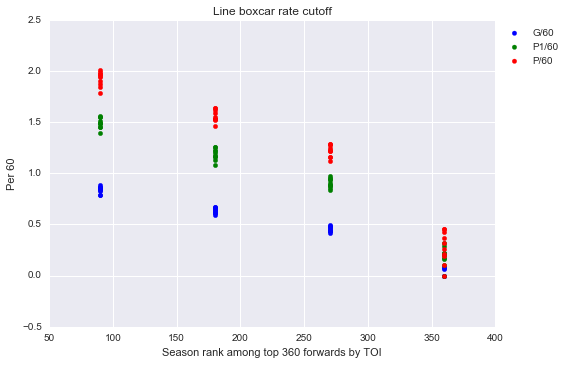

In [5]:
temp = grouped[grouped['G60Rank'] % 90 == 0]
scatter(temp['G60Rank'], temp['G60'], label = 'G/60', color = 'b')
temp = grouped[grouped['P160Rank'] % 90 == 0]
scatter(temp['P160Rank'], temp['P160'], label = 'P1/60', color = 'g')
temp = grouped[grouped['P60Rank'] % 90 == 0]
scatter(temp['P60Rank'], temp['P60'], label = 'P/60', color = 'r')
legend(loc=2, bbox_to_anchor=(1, 1))
title('Line boxcar rate cutoff')
xlabel('Season rank among top 360 forwards by TOI')
ylabel('Per 60')

In [6]:
grouped = defense[['Player', 'Team', 'Season', 'TOION(60s)', 'iG', 'iA1', 'iA2']].groupby(
    ['Player', 'Team', 'Season']).sum()
grouped.reset_index(inplace=True)
grouped['TOIRank'] = grouped.sort_values(by="TOION(60s)", ascending=False).groupby(['Season'])['TOION(60s)'].rank(ascending=False)
grouped.sort_values(by='TOION(60s)', ascending=False, inplace=True)
grouped = grouped[grouped.TOIRank <= 180]
grouped['G60'] = grouped['iG']/grouped['TOION(60s)']
grouped['P160'] = (grouped['iG'] + grouped['iA1'])/grouped['TOION(60s)']
grouped['P60'] = (grouped['iG'] + grouped['iA1'] + grouped['iA2'])/grouped['TOION(60s)']
grouped['G60Rank'] = grouped.sort_values(by="G60", ascending=False).groupby(['Season'])['G60'].rank(ascending=False)
grouped['P160Rank'] = grouped.sort_values(by="P160", ascending=False).groupby(['Season'])['P160'].rank(ascending=False)
grouped['P60Rank'] = grouped.sort_values(by="P60", ascending=False).groupby(['Season'])['P60'].rank(ascending=False)
grouped.head()

,Player,Team,Season,TOION(60s),iG,iA1,iA2,TOIRank,G60,P160,P60,G60Rank,P160Rank,P60Rank
2697,Ryan McDonagh,NYR,2011,33.913333,6,12,11,1,0.176922,0.530765,0.855121,58,40,45
1010,Duncan Keith,CHI,2009,33.733611,10,20,23,1,0.296440,0.889321,1.571133,16,2,2
1015,Duncan Keith,CHI,2014,33.723611,10,13,14,1,0.296528,0.682015,1.097154,29,23,30
2432,Niklas Hjalmarsson,CHI,2014,33.720000,3,7,11,2,0.088968,0.296560,0.622776,136,127,115
2733,Ryan Suter,MIN,2013,33.196111,3,5,16,1,0.090372,0.240992,0.722976,131,151,85


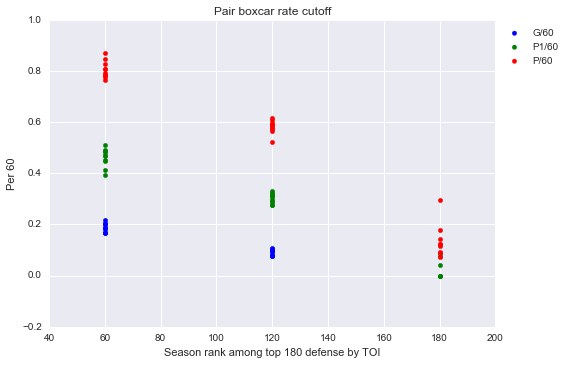

In [7]:
temp = grouped[grouped['G60Rank'] % 60 == 0]
scatter(temp['G60Rank'], temp['G60'], label = 'G/60', color = 'b')
temp = grouped[grouped['P160Rank'] % 60 == 0]
scatter(temp['P160Rank'], temp['P160'], label = 'P1/60', color = 'g')
temp = grouped[grouped['P60Rank'] % 60 == 0]
scatter(temp['P60Rank'], temp['P60'], label = 'P/60', color = 'r')
legend(loc=2, bbox_to_anchor=(1, 1))
title('Pair boxcar rate cutoff')
xlabel('Season rank among top 180 defense by TOI')
ylabel('Per 60')